# Indian Liver Patient Records
Patients with Liver disease have been continuously increasing because of excessive consumption of alcohol, inhale of harmful gases, intake of contaminated food, pickles and drugs. This notebook can used to classify whether a person is liver patient or not based upon certain attributes in an effort to reduce burden on doctors. 

In [1]:
# Import all required libraries for reading, analysing and visualizing data
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Data Analysis

In [4]:
# read the data from the csv file
records = pd.read_csv('indian_liver_patient.csv')

In [5]:
display(records.head())

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [6]:
records.shape

(583, 11)

In [7]:
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [8]:
# describe gives statistical information about NUMERICAL columns in the dataset
records.describe(include = 'all')

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000


In [9]:
# check if any of the columns has null values
records.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

## Data corrections/improvements

In [10]:
# replace 2 in 'Dataset' column with 0
records['Dataset'] = records['Dataset'].replace(2, 0)

In [11]:
# make the gender column into numerical format
records['Gender'] = records['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

In [12]:
# 'Albumin_and_Globulin_Ratio' column contains 4 null values, so fill these values with the mean of the column values
records[records['Albumin_and_Globulin_Ratio'].isnull()]
records["Albumin_and_Globulin_Ratio"] = records.Albumin_and_Globulin_Ratio.fillna(records['Albumin_and_Globulin_Ratio'].mean())

## Data Visualization

Number of people diagonised with liver disease:  416
Number of people not diagonised with liver disease:  167


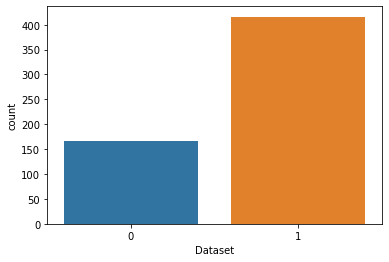

In [13]:
# visualize number of patients diagonised with liver diesease
sns.countplot(data = records, x = 'Dataset');

p1, p2 = records['Dataset'].value_counts()
print('Number of people diagonised with liver disease: ', p1)
print('Number of people not diagonised with liver disease: ', p2)

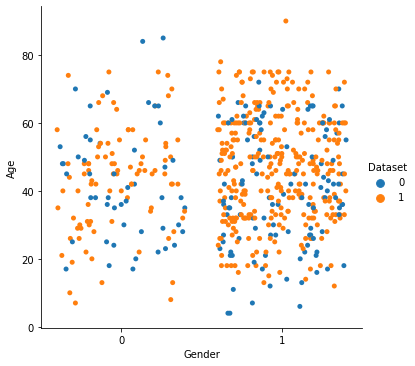

In [14]:
sns.catplot(data = records, x = 'Gender', y = 'Age', hue = 'Dataset', jitter = 0.4);

### Checking the impact of Total_Bilirubin on Dataset

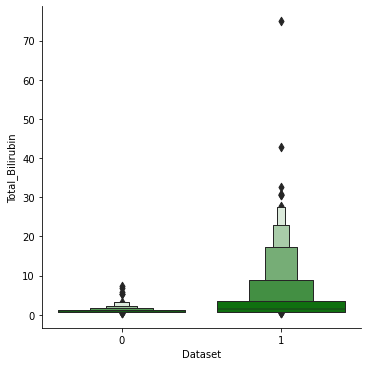

In [15]:
sns.catplot(x='Dataset', y='Total_Bilirubin', data=records, kind = 'boxen', color = 'green');

### Checking the impact of Direct_Bilirubin on Dataset

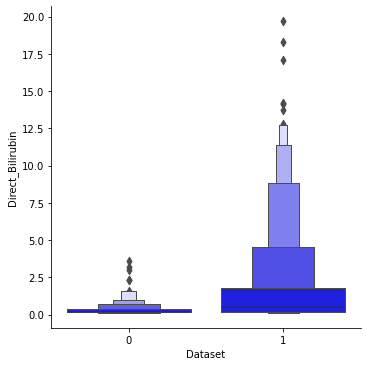

In [16]:
sns.catplot(x='Dataset', y='Direct_Bilirubin', data=records, kind = 'boxen', color = 'blue');

### Checking the impact of Alkaline_Phosphotase on Dataset

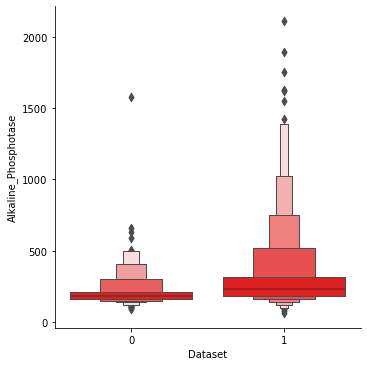

In [17]:
sns.catplot(x='Dataset', y='Alkaline_Phosphotase', data=records, kind = 'boxen', color = 'red');

### Checking the impact of Alamine_Aminotransferase on Dataset

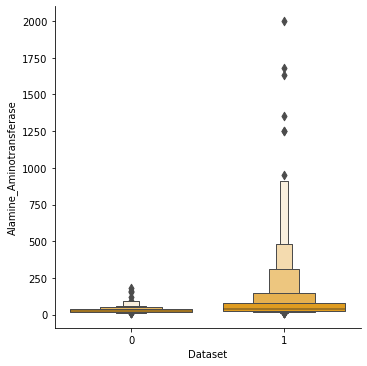

In [18]:
sns.catplot(x='Dataset', y='Alamine_Aminotransferase', data=records, kind = 'boxen', color = 'orange');

### Checking the impact of Aspartate_Aminotransferase on Dataset

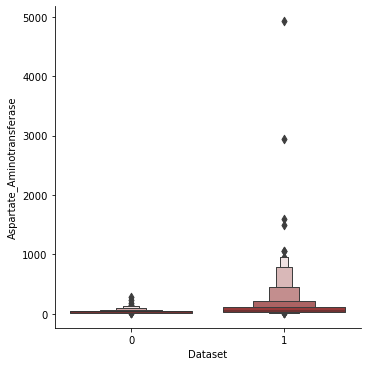

In [19]:
sns.catplot(x='Dataset', y='Aspartate_Aminotransferase', data=records, kind = 'boxen', color = 'brown');

### Checking the impact of Total_Protiens on Dataset

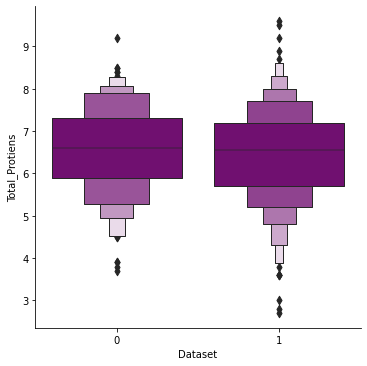

In [20]:
sns.catplot(x='Dataset', y='Total_Protiens', data=records, kind = 'boxen', color = 'purple');

### Checking the impact of Albumin on Dataset

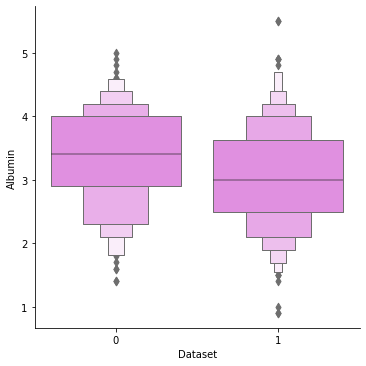

In [21]:
sns.catplot(x='Dataset', y='Albumin', data=records, kind = 'boxen', color = 'violet');

### Checking the impact of Albumin_and_Globulin_Ratio on Dataset

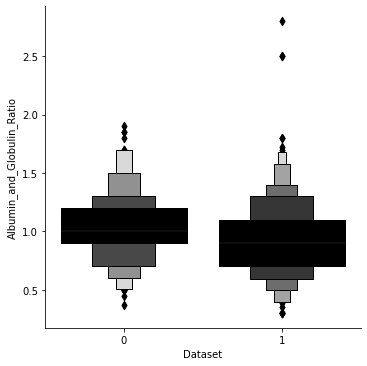

In [22]:
sns.catplot(x='Dataset', y='Albumin_and_Globulin_Ratio', data=records, kind = 'boxen', color = 'black');

### Heatmap of correlation between features

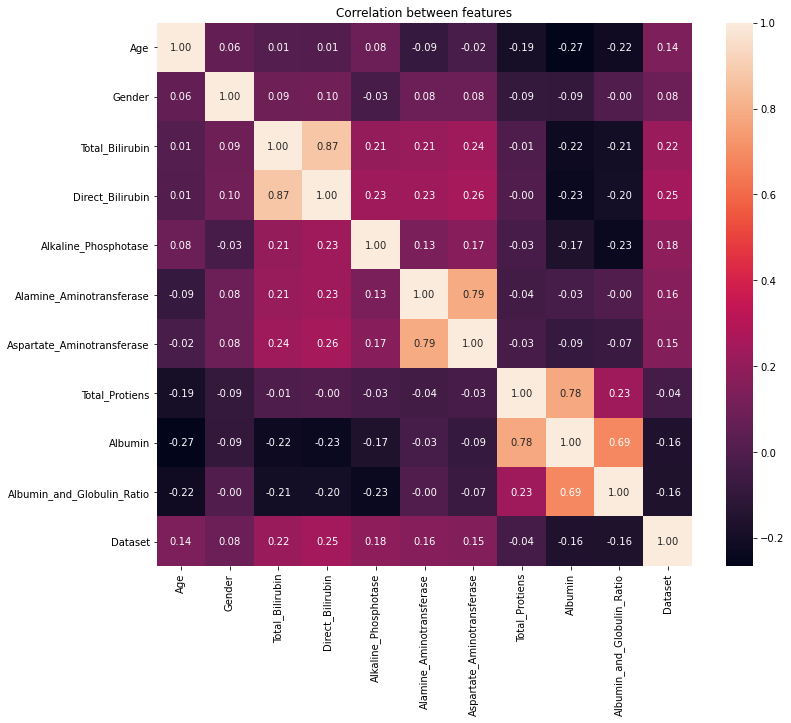

In [23]:
plt.figure(figsize=(12, 10))
plt.title('Correlation between features');
sns.heatmap(records.corr(), annot = True, fmt = '0.2f');

## Machine Learning

In [24]:
# import the required modules
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [25]:
data = records.values
X = data[:, :-1]
Y = data[:, -1]

### Get the training and test data using train_test_split

In [26]:
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size=0.3, random_state = 123)
Y_train = Y_train.reshape(408, 1)
Y_test = Y_test.reshape(175, 1)
print("X_train shape:" + str(X_train.shape))
print("Y_train shape:" + str(Y_train.shape))
print("X_test shape:" + str(X_test.shape))
print("Y_test shape:" + str(Y_test.shape))

X_train shape:(408, 10)
Y_train shape:(408, 1)
X_test shape:(175, 10)
Y_test shape:(175, 1)


### 1. Using Logistic Regression

In [27]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

# train and test scores
lr_train_score = round(logreg.score(X_train, Y_train) * 100, 2)
lr_test_score = round(logreg.score(X_test, Y_test) * 100, 2)
# predicted output
Y_pred_lr = logreg.predict(X_test)

print('Logistic Regression train score: ', lr_train_score)
print('Logistic Regression test score: ', lr_test_score)
print('Classification Report: \n', classification_report(Y_test, Y_pred_lr))
print('Confusion Matrix:\n', confusion_matrix(Y_test, Y_pred_lr))

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Logistic Regression train score:  73.04
Logistic Regression test score:  72.0
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.50      0.18      0.27        49
         1.0       0.75      0.93      0.83       126

    accuracy                           0.72       175
   macro avg       0.62      0.56      0.55       175
weighted avg       0.68      0.72      0.67       175

Confusion Matrix:
 [[  9  40]
 [  9 117]]


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 2. Using Random Forest Classifier

In [28]:
rf_cl = RandomForestClassifier()
rf_cl.fit(X_train, Y_train)

# train and test scores
rf_train_score = round(rf_cl.score(X_train, Y_train) * 100, 2)
rf_test_score = round(rf_cl.score(X_test, Y_test) * 100, 2)
# predicted output
Y_pred_rf = rf_cl.predict(X_test)

print('Random Forest train score: ', rf_train_score)
print('Random Forest test score: ', rf_test_score)
print('Classification Report: \n', classification_report(Y_test, Y_pred_rf))
print('Confusion Matrix:\n', confusion_matrix(Y_test, Y_pred_rf))

<ipython-input-28-22d19489822b>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_cl.fit(X_train, Y_train)


Random Forest train score:  100.0
Random Forest test score:  72.57
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.51      0.37      0.43        49
         1.0       0.78      0.87      0.82       126

    accuracy                           0.73       175
   macro avg       0.65      0.62      0.62       175
weighted avg       0.70      0.73      0.71       175

Confusion Matrix:
 [[ 18  31]
 [ 17 109]]


### 3. Using Support Vector Machines

In [29]:
svm_cl = svm.SVC()
svm_cl.fit(X_train, Y_train)

# train and test scores
svm_train_score = round(svm_cl.score(X_train, Y_train) * 100, 2)
svm_test_score = round(svm_cl.score(X_test, Y_test) * 100, 2)
# predicted output
Y_pred_svm = svm_cl.predict(X_test)

print('SVM train score: ', svm_train_score)
print('SVM score: ', svm_test_score)
print('Classification Report: \n', classification_report(Y_test, Y_pred_svm))
print('Confusion Matrix:\n', confusion_matrix(Y_test, Y_pred_svm))

SVM train score:  71.08
SVM score:  72.0
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        49
         1.0       0.72      1.00      0.84       126

    accuracy                           0.72       175
   macro avg       0.36      0.50      0.42       175
weighted avg       0.52      0.72      0.60       175

Confusion Matrix:
 [[  0  49]
 [  0 126]]


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precisi

In [33]:
grid_param = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}

In [35]:
from sklearn.model_selection import RandomizedSearchCV
rand_search = RandomizedSearchCV(estimator=rf_cl,param_distributions=grid_param,cv=5,n_jobs =-1,verbose = 3)

In [37]:
rand_search.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 20),
                                        'max_features': ['auto', 'log2'],
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(2, 10),
                                        'n_estimators': [90, 100, 115, 130]},
                   verbose=3)

In [38]:
rand_search.best_params_
print(rand_search.best_params_)

{'n_estimators': 90, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_depth': 5, 'criterion': 'gini'}


In [39]:
rand_search.best_score_

0.7183679614573922

In [40]:
rand_clf = RandomForestClassifier(criterion= 'gini',
 max_depth = 5,
 max_features = 'log2',
 min_samples_leaf = 3,
 min_samples_split= 4,
 n_estimators = 90,random_state=6)

In [41]:
rand_clf.fit(X_train,Y_train)

<ipython-input-41-80eec28f55cc>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand_clf.fit(X_train,Y_train)


RandomForestClassifier(max_depth=5, max_features='log2', min_samples_leaf=3,
                       min_samples_split=4, n_estimators=90, random_state=6)

In [42]:
rand_clf.score(X_test,Y_test)

0.72

In [43]:
from xgboost import XGBClassifier

In [45]:
# fit model no training data
model = XGBClassifier(objective='binary:logistic')
model.fit(X_train, Y_train)

C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[18:16:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [46]:
model.score(X_test,Y_test)

0.7428571428571429

In [47]:
import scipy.stats as stats

In [48]:
param_dist = {'n_estimators':[90,100,115,130],
              'learning_rate': stats.uniform(0.01, 0.6),
              'subsample': stats.uniform(0.3, 0.9),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.9),
              'min_child_weight': [1, 2, 3, 4]
             }

In [49]:
clf = RandomizedSearchCV(model, param_distributions = param_dist, n_iter = 25, scoring = 'accuracy', error_score = 0, verbose = 3, n_jobs = -1)


In [50]:
clf.fit(X_train,Y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[18:17:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


RandomizedSearchCV(error_score=0,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs...
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001812DF317F0>,
                                        'lea

In [51]:
clf.best_params_

{'colsample_bytree': 0.694692051272619,
 'learning_rate': 0.011862311601127575,
 'max_depth': 9,
 'min_child_weight': 3,
 'n_estimators': 115,
 'subsample': 0.4826383051175943}

In [52]:
Xgboost_clf = XGBClassifier(colsample_bytree=  0.694692051272619,
 learning_rate= 0.011862311601127575,
 max_depth=9,
 min_child_weight= 3,
 n_estimators= 115,
 subsample=0.4826383051175943)

In [53]:
Xgboost_clf.fit(X_train,Y_train)

[18:18:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.694692051272619, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.011862311601127575, max_delta_step=0, max_depth=9,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=115, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.4826383051175943, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [54]:
y_pred1=Xgboost_clf.predict(X_test)

In [56]:
acc1=accuracy_score(y_pred1,Y_test)

In [57]:
acc1

0.7371428571428571

In [58]:
from sklearn.metrics import roc_curve

In [61]:
y_score1 = Xgboost_clf.predict_proba(X_test)[:,1]
y_score2 = rand_clf.predict_proba(X_test)[:,1]

In [62]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(Y_test, y_score2)

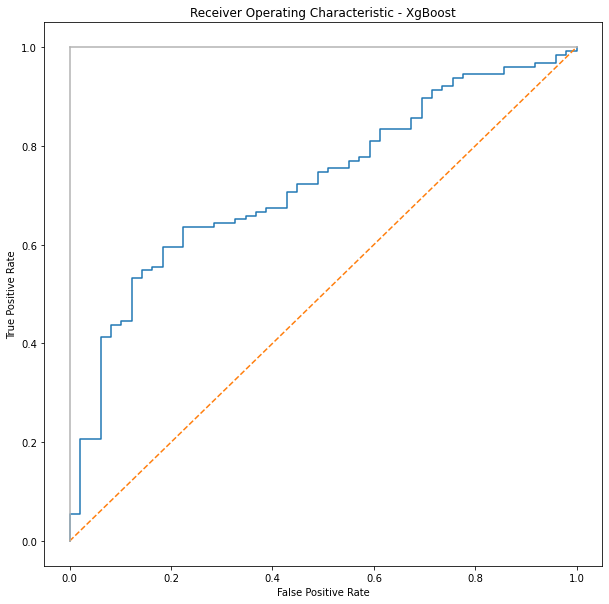

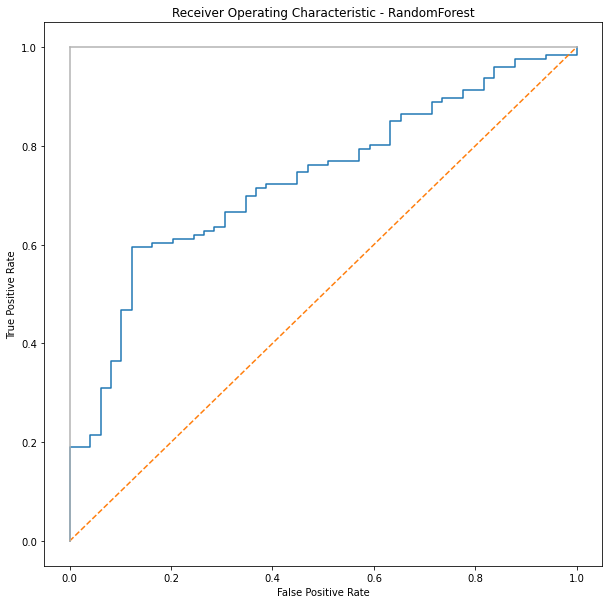

In [63]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - XgBoost')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - RandomForest')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [64]:
from sklearn.metrics import roc_auc_score

In [66]:
print('roc_auc_score for XgBoost: ', roc_auc_score(Y_test, y_score1))
print('roc_auc_score for Random Forest: ', roc_auc_score(Y_test, y_score2))

roc_auc_score for XgBoost:  0.7236799481697441
roc_auc_score for Random Forest:  0.7309685779073534


In [67]:
import pickle

In [68]:
with open(r'E:\College Project\Liver Disease Deployment'+ '/modelForPrediction.pkl', 'wb') as f:
    pickle.dump(rand_clf,f)